<a href="https://colab.research.google.com/github/dansernago/Entregables---IA/blob/main/Mision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nombres:
#David Ramirez Ortiz
#Laura Sofía Blandón Garcés
#Santiago Alejandro Cardona

In [ ]:
# 1.Introducción al Aprendizaje Automático y Dataset de Películas**

El aprendizaje supervisado ha encontrado aplicaciones significativas en la industria cinematográfica, permitiendo prever el rendimiento de las películas, analizar tendencias y optimizar decisiones relacionadas con la producción y el marketing. Entre sus usos más frecuentes se incluyen la predicción de ingresos en taquilla, la evaluación de críticas, el análisis del público objetivo y la recomendación de contenidos. A través de modelos de regresión o clasificación, los estudios cinematográficos pueden anticipar el éxito comercial de una película antes de su estreno, lo que les permite tomar decisiones informadas sobre presupuestos, campañas publicitarias y estrategias de distribución.

En cuanto a las variables clave en un conjunto de datos que relaciona ingresos y éxito de una película, algunas de las más importantes son: el presupuesto, que influye directamente en la calidad de la producción y su capacidad para generar ingresos; el género, que afecta al público objetivo y las expectativas de éxito en mercados específicos; el número de actores principales reconocidos, ya que las estrellas pueden atraer a un mayor número de espectadores; las calificaciones de los críticos y las opiniones en plataformas de reseñas, que impactan en la percepción del público; y la estrategia de marketing, que abarca aspectos como la cantidad de promoción y distribución. Estas variables tienen un efecto directo en la percepción de la película y en su probabilidad de generar altos ingresos, lo que a su vez influye en las predicciones de éxito. En nuestra regresión lineal, nos enfocaremos en analizar tres variables principales relacionadas con la recaudación (Gross) de la película: el presupuesto, la puntuación en IMDB y la duración.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
dataset = pd.read_csv ('/content/movie_metadata.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0$,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0$,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0$,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0$,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0$,2009.0,11000.0,7.5,2.35,10000


In [ ]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
#Limpieza de la base de datos

In [ ]:
duplicados = dataset.duplicated().sum()
print(f'Duplicados encontrados:{duplicados}')

Duplicados encontrados:45


In [ ]:
dataset.drop (['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
              'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
              'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link','language',
              'country', 'content_rating'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4993 non-null   float64
 1   duration                 5028 non-null   float64
 2   director_facebook_likes  4939 non-null   float64
 3   actor_3_facebook_likes   5020 non-null   float64
 4   actor_1_facebook_likes   5036 non-null   float64
 5   gross                    4159 non-null   float64
 6   num_user_for_reviews     5022 non-null   float64
 7   budget                   5043 non-null   object 
 8   title_year               4935 non-null   float64
 9   actor_2_facebook_likes   5030 non-null   float64
 10  imdb_score               5043 non-null   float64
 11  aspect_ratio             4714 non-null   float64
 12  movie_facebook_likes     5043 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 512.3+ KB


In [ ]:
dataset['movie_facebook_likes'] = dataset['movie_facebook_likes'].astype(float)

In [ ]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4039 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4039 non-null   float64
 1   duration                 4039 non-null   float64
 2   director_facebook_likes  4039 non-null   float64
 3   actor_3_facebook_likes   4039 non-null   float64
 4   actor_1_facebook_likes   4039 non-null   float64
 5   gross                    4039 non-null   float64
 6   num_user_for_reviews     4039 non-null   float64
 7   budget                   4039 non-null   object 
 8   title_year               4039 non-null   float64
 9   actor_2_facebook_likes   4039 non-null   float64
 10  imdb_score               4039 non-null   float64
 11  aspect_ratio             4039 non-null   float64
 12  movie_facebook_likes     4039 non-null   float64
dtypes: float64(12), object(1)
memory usage: 441.8+ KB


In [ ]:
dataset.isnull().sum()

,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_1_facebook_likes,0
gross,0
num_user_for_reviews,0
budget,0
title_year,0
actor_2_facebook_likes,0


In [ ]:
# Visualización de variables

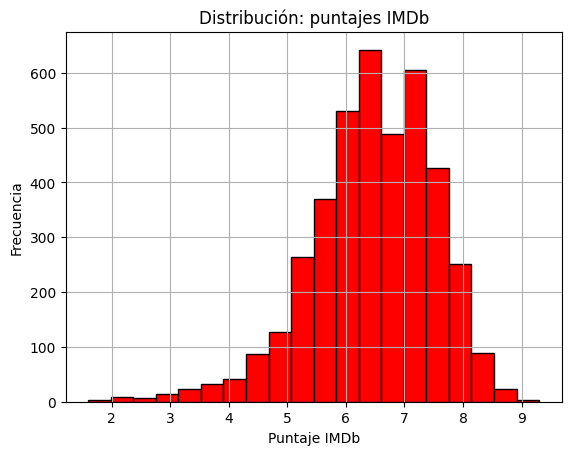

In [ ]:
# Histograma de distribución de variable imdb_score.
plt.hist(dataset['imdb_score'], bins=20, edgecolor='black', color='blue')
plt.title('Distribución: puntajes IMDb')
plt.xlabel('Puntaje IMDb')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# Análisis de correlacion
dataset[['budget', 'imdb_score', 'duration','gross']].dtypes

,0
budget,object
imdb_score,float64
duration,float64
gross,float64


In [ ]:
dataset['budget'] = dataset['budget'].str.replace('$', '').str.replace(',', '').astype(float)

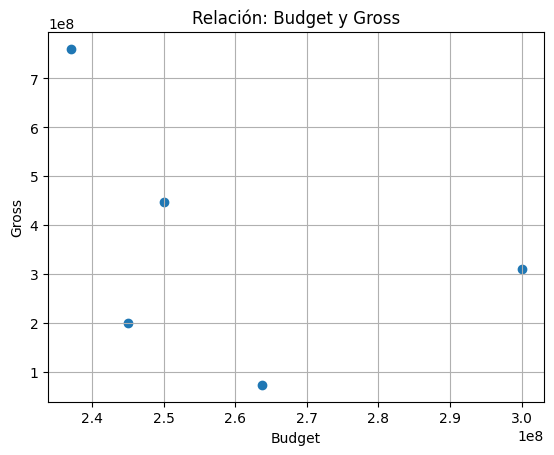

In [ ]:
#Gráficos de dispersión
plt.scatter (dataset['budget'].head(5), dataset['gross'].head(5))
plt.title('Relación: Budget y Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()


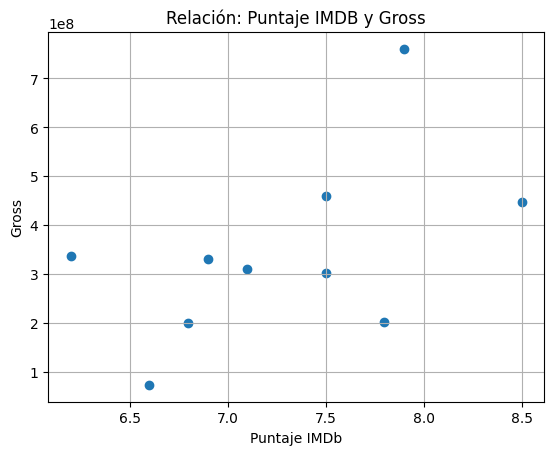

In [ ]:
plt.scatter (dataset['imdb_score'].head(10), dataset['gross'].head(10))
plt.title('Relación: Puntaje IMDB y Gross')
plt.xlabel('Puntaje IMDb')
plt.grid(True)
plt.ylabel('Gross')
plt.show()


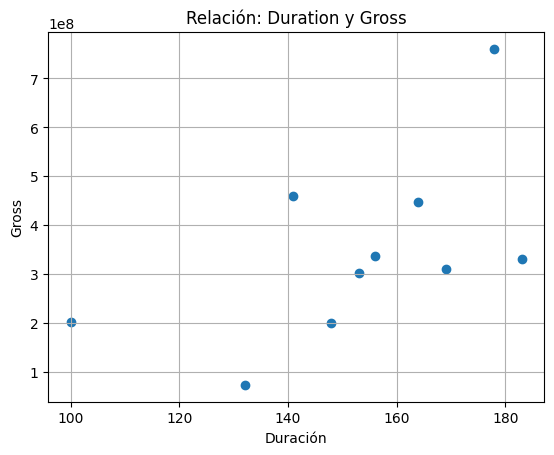

In [ ]:
plt.scatter (dataset['duration'].head(10), dataset['gross'].head(10))
plt.title('Relación: Duration y Gross')
plt.xlabel('Duración')
plt.grid(True)
plt.ylabel('Gross')
plt.show()

In [ ]:
#Archivo ya limpio
dataset.to_csv('movies_clean.csv', index=False)

In [ ]:
# 2.Regresión Lineal para la Predicción de Ingresos

In [ ]:
datasett = pd.read_csv('/content/movies_clean.csv')
datasett.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4.039000e+03,4039.000000,4.039000e+03,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,162.816539,109.812082,767.403565,736.873484,7468.574895,4.980482e+07,320.855905,4.324237e+07,2003.176034,1928.713543,6.473211,2.106871,8960.967566
std,122.257783,22.400738,2986.239738,1832.377398,15161.174710,6.899171e+07,402.366687,2.182754e+08,9.923005,4419.293539,1.049527,0.349084,21044.015974
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,1.000000,0.000000e+00,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,74.000000,95.000000,10.000000,178.500000,722.000000,6.201256e+06,100.000000,8.000000e+06,1999.000000,360.000000,5.900000,1.850000,0.000000
50%,134.000000,106.000000,59.000000,423.000000,1000.000000,2.678172e+07,198.000000,2.200000e+07,2005.000000,660.000000,6.600000,2.350000,204.000000
75%,220.000000,120.000000,226.000000,681.000000,12000.000000,6.407557e+07,382.000000,5.000000e+07,2010.000000,968.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [ ]:
datasett.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4039 non-null   float64
 1   duration                 4039 non-null   float64
 2   director_facebook_likes  4039 non-null   float64
 3   actor_3_facebook_likes   4039 non-null   float64
 4   actor_1_facebook_likes   4039 non-null   float64
 5   gross                    4039 non-null   float64
 6   num_user_for_reviews     4039 non-null   float64
 7   budget                   4039 non-null   float64
 8   title_year               4039 non-null   float64
 9   actor_2_facebook_likes   4039 non-null   float64
 10  imdb_score               4039 non-null   float64
 11  aspect_ratio             4039 non-null   float64
 12  movie_facebook_likes     4039 non-null   float64
dtypes: float64(13)
memory usage: 410.3 KB


In [ ]:
correlationn = datasett.corr()
Grosscorr = correlationn['gross'].sort_values(ascending=False)
print(Grosscorr)

gross                      1.000000
num_user_for_reviews       0.554220
num_critic_for_reviews     0.472311
movie_facebook_likes       0.373839
actor_3_facebook_likes     0.305232
actor_2_facebook_likes     0.259020
duration                   0.250534
imdb_score                 0.200264
actor_1_facebook_likes     0.150824
director_facebook_likes    0.141494
budget                     0.106000
aspect_ratio               0.068000
title_year                 0.038961
Name: gross, dtype: float64


In [ ]:
correlacion = datasett[['num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews','gross']].corr()

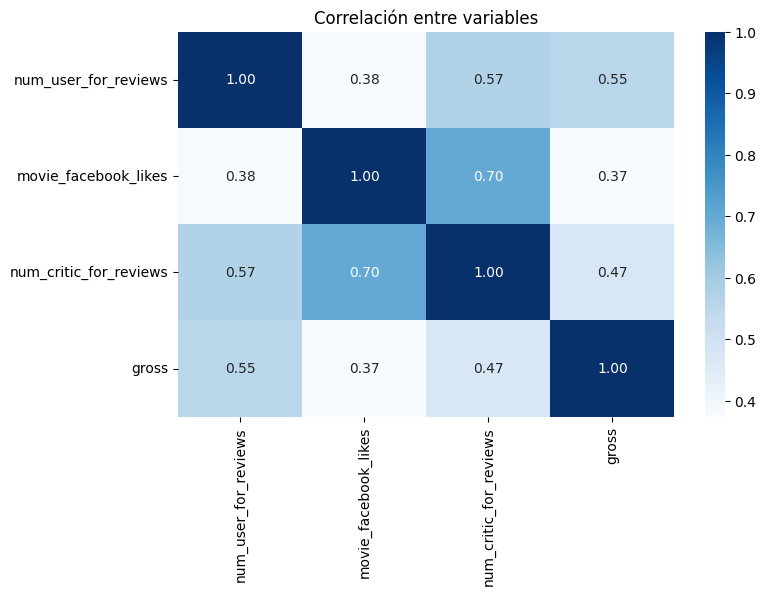

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

In [ ]:
correlacion = dataset[['budget', 'gross', 'duration','imdb_score']].corr()
correlacion

,budget,gross,duration,imdb_score
budget,1.000000,0.106000,0.071037,0.027233
gross,0.106000,1.000000,0.250534,0.200264
duration,0.071037,0.250534,1.000000,0.360688
imdb_score,0.027233,0.200264,0.360688,1.000000


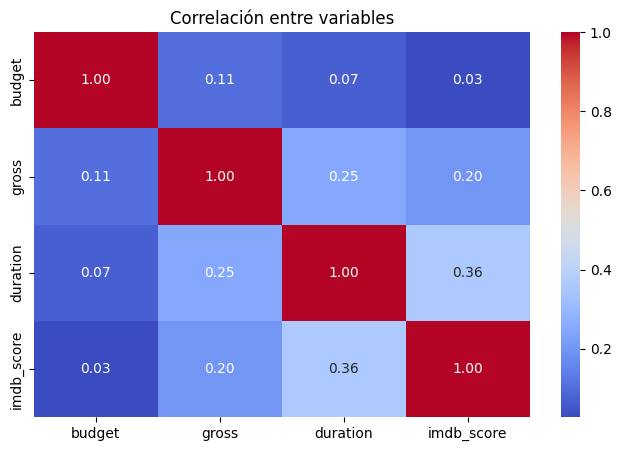

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

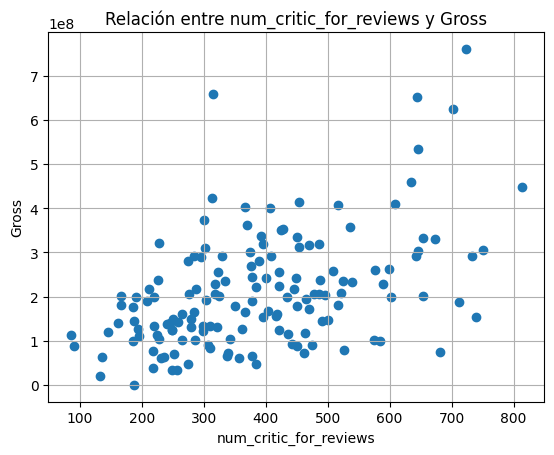

In [ ]:
plt.scatter (datasett['num_critic_for_reviews'].head(150), datasett['gross'].head(150))
plt.title('Relación entre num_critic_for_reviews y Gross')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

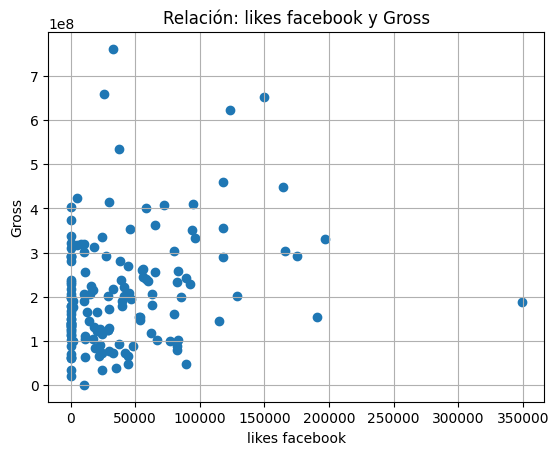

In [ ]:

plt.scatter (datasett['movie_facebook_likes'].head(150), datasett['gross'].head(150))
plt.title('Relación: likes facebook y Gross')
plt.xlabel('likes facebook')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

# MODELO
El modelo aprende patrones a partir de los datos proporcionados para predecir la recaudación.
Se definen las características (X) y la etiqueta (y) con base en los datos previamente mencionados, dividiendo el conjunto de datos en dos partes: una para entrenamiento y otra para prueba.

In [ ]:
X = datasett[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = datasett['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializar y entrenar
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("R² Score:", r2)


Error Absoluto Medio (MAE): 36251596.895499185
Error Cuadrático Medio (MSE): 3197701605711774.0
R² Score: 0.3954031525240511


Análisis de los errores

El error absoluto medio (MAE) de 36.2 millones es relativamente bajo, dado que los ingresos brutos (gross) varían entre 200 y 760 millones. Este margen de error corresponde aproximadamente al 5% de la recaudación, lo que se considera aceptable.

En cuanto al valor de R², que es 0.39, esto indica que el modelo es capaz de explicar el 39% de la variabilidad de los ingresos brutos (gross) en función de las características incluidas.

In [ ]:
## Diagnóstico del modelo

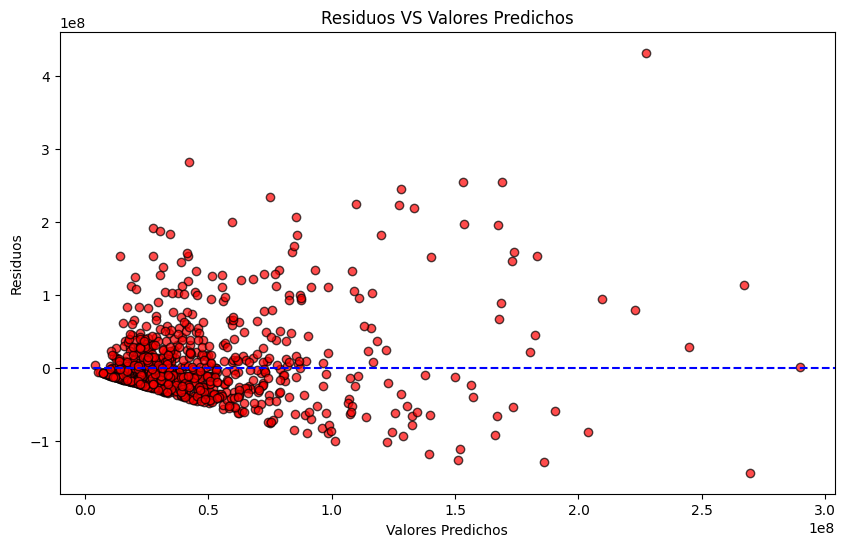

In [ ]:
residuos = y_test - y_pred

# 1. Gráfico de residuos VS valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuos VS Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')


plt.show()



Este gráfico se utiliza para evaluar la homoscedasticidad. Se observa una concentración de valores cercanos y algunos dispersos, lo que sugiere una mayor varianza en ciertos casos. Esto indica que no se cumple con la homoscedasticidad para los valores predichos más altos.

In [ ]:
dw_stat = sm.stats.durbin_watson(residuos)
print("Durbin-Watson:", dw_stat)
# Interpretación:
# - Valor cercano a 2 indica independencia.
# - Valor cercano a 0 sugiere autocorrelación positiva.
# - Valor cercano a 4 sugiere autocorrelación negativa.

Durbin-Watson: 2.0029893363015083


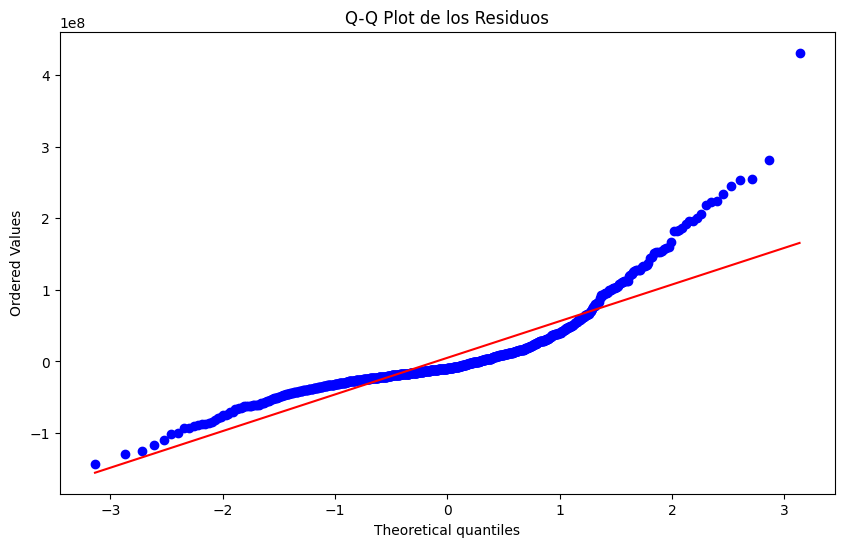

In [ ]:
# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuos')

plt.show()

In [ ]:
# 3. Regresión Logística para Clasificación de Películas

In [ ]:
percentil_75 = datasett['gross'].quantile(0.75)
dataset2['exito'] = datasett['gross'].apply(lambda x: 1 if x > percentil_75 else 0)

# Definir variables predictoras y la variable dependiente
X = datasett[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = datasett['exito']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  exito   No. Observations:                 4039
Model:                          Logit   Df Residuals:                     4032
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.1548
Time:                        19:26:00   Log-Likelihood:                -1919.9
converged:                       True   LL-Null:                       -2271.5
Covariance Type:            nonrobust   LLR p-value:                1.234e-148
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8423      0.296     -9.603      0.000      -3.422      

Aqui se analizan las variables significativas y no significativas:

Variables significativas: budget, duration, num_user_for_reviews y num_critic_for_reviwes siendo indispensables.

Variables no significativas: Imdb_Score, num_facebook_lives, no tan indispensables para este analisis.

In [ ]:
# Predicción de probabilidades y clasificación
y_pred_prob = result.predict(X)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Cálculo de las métricas
precision = precision_score(y, y_pred_class)
recall = recall_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)
accuracy = accuracy_score(y, y_pred_class)
auc = roc_auc_score(y, y_pred_prob)

print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"AUC: {auc:.2f}")

Precisión: 0.68
Sensibilidad (Recall): 0.27
F1 Score: 0.39
Exactitud (Accuracy): 0.79
AUC: 0.77


El modelo muestra un rendimiento aceptable en precisión y exactitud, lo que indica que es capaz de identificar correctamente una buena proporción de las películas exitosas. Sin embargo, su baja sensibilidad señala que muchas películas exitosas no son reconocidas como tales. Esto sugiere que el modelo podría mejorar en la detección de este tipo de películas.

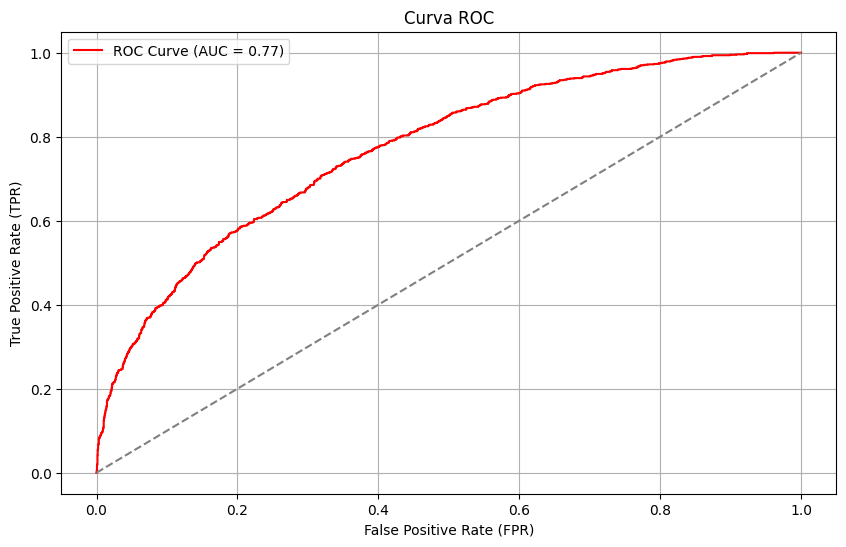

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# 4. Afinamiento y evaluación avanzada de modelos

In [ ]:
# 5. Extensión K-means para segmentación de películas

In [ ]:
selected_features = ['budget','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews','gross']
data_selected = dataset2[selected_features]

# Estandarizar las características para normalizar la escala de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Convertir los datos estandarizados a un DataFrame para claridad
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)

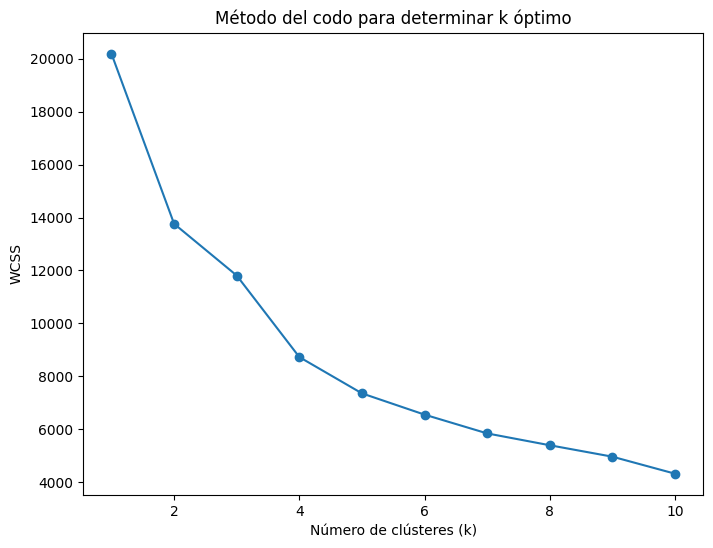

In [ ]:
# Calcular el WCSS para diferentes valores de k (1 a 10)
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

# Graficar el diagrama de codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Método del codo para determinar k óptimo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.show()


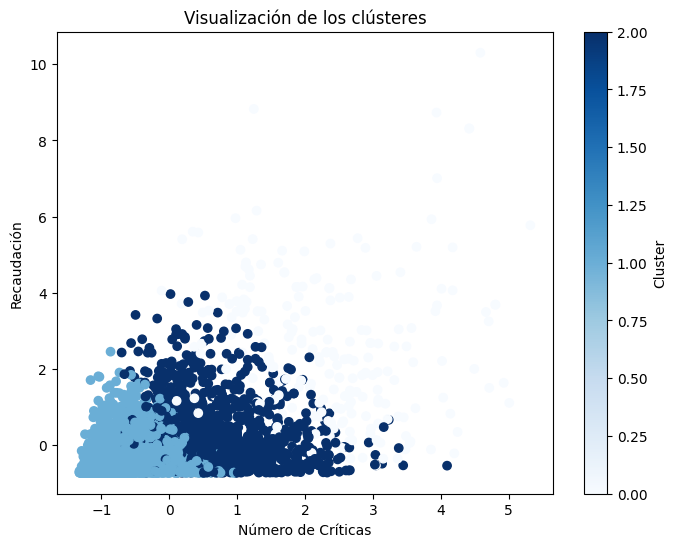

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_df['num_critic_for_reviews'], data_scaled_df['gross'], c=data_scaled_df['Cluster'], cmap='Blues')
plt.title('Visualización de los clústeres')
plt.xlabel('Número de Críticas')
plt.ylabel('Recaudación')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
#Características principales de cada clúster

#Clúster 0 - Puntos oscuros: Este clúster probablemente agrupa películas con bajo presupuesto, pocas críticas y baja recaudación.
#Se recomienda centrarse en campañas digitales de bajo costo, colaboraciones con influencers y participación en festivales locales para aumentar la visibilidad.
#Además, las plataformas de streaming pueden ser una vía clave para alcanzar una mayor audiencia.


#Clúster 1 - Puntos turquesa: Las películas en este clúster tienen un presupuesto moderado, recaudación media y críticas más destacadas.
#Se sugiere implementar promociones en redes sociales, combinadas con campañas de lanzamiento en cines regionales.
#Además, es importante segmentar audiencias específicas según género o intereses para maximizar la efectividad del gasto publicitario.


#Clúster 2 - Puntos amarillos: Este grupo está compuesto por películas con alto presupuesto, muchas críticas y una recaudación considerable.
#Para este tipo de proyectos, se recomienda invertir en campañas de marketing globales, publicidad masiva y lanzamientos en eventos internacionales.
#También se debe aprovechar la participación de actores famosos para atraer audiencias más amplias y mejorar la visibilidad del filme.

In [ ]:
#6. Conclusiones

#Estimación de ingresos: A pesar de que el modelo de regresión lineal no ofrece una precisión total (con un R² de 0.39), sí brinda una aproximación razonable de
#los ingresos que podría generar una película, considerando factores como el presupuesto, la duración, la calificación en IMDB y la actividad en redes sociales.
#Esto lo convierte en una herramienta valiosa para prever el rendimiento financiero de una película antes de su lanzamiento.


#Elementos clave para el éxito: El análisis realizado mediante regresión logística reveló que aspectos como el presupuesto, la duración, la cantidad de reseñas
#de usuarios y el número de críticas son fundamentales para evaluar el éxito de una película.
#Por otro lado, factores como la calificación en IMDB y la interacción en Facebook mostraron una relevancia estadística menor,
#sugiriendo que el éxito podría estar más vinculado a elementos relacionados con la producción y la crítica que a su popularidad en plataformas sociales.

#Clasificación de películas: La implementación del método K-means permitió agrupar las películas en tres categorías con características distintivas.
#Esto facilita el desarrollo de estrategias de marketing adaptadas a cada segmento, optimizando así la inversión en publicidad y la distribución.

#Limitaciones y áreas de mejora: Los modelos presentan ciertas limitaciones. Por ejemplo, el modelo de regresión logística tiene una sensibilidad reducida,
#lo que significa que podría no identificar todas las películas que resultan exitosas.
#Para mejorar su efectividad, se podría considerar la inclusión de variables adicionales, como el género, el elenco o la fecha de estreno.
#Además, sería beneficioso utilizar técnicas avanzadas de aprendizaje automático para lograr predicciones más precisas.




